# **Russia Ukrain War Sentiment Analysis on Twitter Data**

### **Data 602: Final Project**


Russia Ukrane war took place on 24th Feburary'2022. In this notebook we have tried to analye the sentiment of the people around the world by focusing on the news which is broadcasted on this subject across the globe.
The project proceeds with the flow mentioned below:


1.   Installing and Importing the required libraries.
2.   Data Cleaning and Data Wrangling.
3. Basic analysis on the data.
4. Sentiment Analysis
5. Model training through naive Bayes and pipeline.
6. Conclusion.
7. Future Work.



### Installing relevant libraries

In [8]:
!pip install textblob

In [9]:
!pip install transformers

     |████████████████████████████████| 4.2 MB 5.1 MB/s 
     |████████████████████████████████| 596 kB 60.5 MB/s 
     |████████████████████████████████| 84 kB 2.0 MB/s 
     |████████████████████████████████| 6.6 MB 40.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [10]:
!pip install tensorflow

     |████████████████████████████████| 462 kB 4.8 MB/s 


In [11]:
!pip install snorkel

     |████████████████████████████████| 103 kB 4.4 MB/s 
     |████████████████████████████████| 22.3 MB 3.4 MB/s 
     |████████████████████████████████| 5.6 MB 41.6 MB/s 
     |████████████████████████████████| 14.8 MB 36.8 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incomp

In [12]:
!pip install spacy

In [13]:
!pip install tweepy stylecloud -q

     |████████████████████████████████| 262 kB 5.1 MB/s 
     |████████████████████████████████| 161 kB 39.9 MB/s 
     |████████████████████████████████| 87 kB 4.5 MB/s 
     |████████████████████████████████| 87 kB 3.6 MB/s 


In [14]:
!pip install plotly

In [15]:
!pip install pyyaml==5.4.1

     |████████████████████████████████| 636 kB 5.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [16]:
#Snorkel
from snorkel.labeling import LabelingFunction
import re
from snorkel.preprocess import preprocessor
from textblob import TextBlob
from snorkel.labeling import PandasLFApplier
from snorkel.labeling.model import LabelModel
from snorkel.labeling import LFAnalysis
from snorkel.labeling import filter_unlabeled_dataframe
from snorkel.labeling import labeling_function
#NLP packages
import spacy
from nltk.corpus import stopwords
import string
import nltk
import nltk.tokenize
punc = string.punctuation
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#general purpose packages
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from textblob import TextBlob
import stylecloud


#data processing
import re, string
#import emoji
import nltk

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel

# #keras
# import tensorflow as tf
# from tensorflow import keras


#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#set seed for reproducibility
seed=42

#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

In [19]:
df1=pd.read_csv('https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20602/Project/new_files/0401_UkraineCombinedTweetsDeduped%202_0_row_25000_b70b08ee-ab3b-4cc2-9358-0cc4a062d01c.csv')
df2=pd.read_csv('https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20602/Project/new_files/0401_UkraineCombinedTweetsDeduped%202_1_row_25000_5e10f0f8-f3cb-4c7f-8eee-a0449779cd5d.csv')
df3=pd.read_csv('https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20602/Project/new_files/0401_UkraineCombinedTweetsDeduped%202_2_row_25000_a6fb59a3-2349-415a-bc23-9340c1e26f73.csv')
df4=pd.read_csv('https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20602/Project/new_files/0401_UkraineCombinedTweetsDeduped%202_3_row_25000_302a4a40-1d5b-4652-9859-f02442e88343.csv')
df5=pd.read_csv('https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20602/Project/new_files/0401_UkraineCombinedTweetsDeduped%202_4_row_25000_c8fbf6fc-14cd-4488-b582-4424102c2619.csv')
df6=pd.read_csv('https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20602/Project/new_files/0401_UkraineCombinedTweetsDeduped%202_5_row_25000_389452dd-9e47-4169-82dc-55ddf17dd92e.csv')
df7=pd.read_csv('https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20602/Project/new_files/0401_UkraineCombinedTweetsDeduped%202_6_row_25000_1c06e08d-f45f-4ec7-b1ba-304e8ce244c7.csv')
df8=pd.read_csv('https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20602/Project/new_files/0401_UkraineCombinedTweetsDeduped%202_7_row_25000_7c457e3a-d8f1-45e3-b9fe-68fc6cbf4e87.csv')
df9=pd.read_csv('https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20602/Project/new_files/0401_UkraineCombinedTweetsDeduped%202_8_row_25000_23a7a58e-c878-414f-bd9c-ea6ab5bc46d1.csv')
df10=pd.read_csv('https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20602/Project/new_files/0401_UkraineCombinedTweetsDeduped%202_9_row_25000_f04203a6-a6cb-4bbe-8def-55a5d0b4f2b5.csv')
df11=pd.read_csv('https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20602/Project/new_files/0401_UkraineCombinedTweetsDeduped%202_10_row_25000_2161907b-1792-4b0e-a4e1-db81e82ccc6c.csv')
df12=pd.read_csv('https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20602/Project/new_files/0401_UkraineCombinedTweetsDeduped%202_11_row_25000_95584954-4b67-44f5-8600-37a703c789f1.csv')
df13=pd.read_csv('https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20602/Project/new_files/0401_UkraineCombinedTweetsDeduped%202_12_row_25000_630b3218-eb9c-4217-b3ac-c67564e702c7.csv')
df14=pd.read_csv('https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20602/Project/new_files/0401_UkraineCombinedTweetsDeduped%202_13_row_25000_743bdbfb-64d9-4694-8ba1-7715fd5175f4.csv')
df15=pd.read_csv('https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20602/Project/new_files/0401_UkraineCombinedTweetsDeduped%202_14_row_25000_5335e9ef-dfea-4e56-87c7-f4bd9dce6d90.csv')


df_new=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15],ignore_index=True)
df_new.head()


,Unnamed: 0,Unnamed: 0.1,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,tweet,hashtags,language,coordinates,favorite_count,extractedts
0,0,0,1.688277e+07,Yaniela,"Animal lover, supports those who fight injusti...",Hawaii,1158,392,88366,34:04.0,1.509680e+18,00:00.0,3412,⚡The Ukrainian Air Force would like to address...,[],en,NaN,0,44:20.1
1,1,1,3.205296e+09,gregffff,NaN,NaN,122,881,99853,24:34.0,1.509680e+18,00:00.0,100,Chernihiv oblast. Ukrainians welcome their lib...,"[{'text': 'russianinvasion', 'indices': [77, 9...",en,NaN,0,09:37.1
2,2,2,1.235940e+18,ThanapornThon17,เล่นไวโอลิน\nพูดภาษาจีน,NaN,231,72,5481,52:01.0,1.509680e+18,00:00.0,9,America 🇺🇸 is preparing for something worse th...,"[{'text': 'RussianUkrainianWar', 'indices': [7...",en,NaN,0,09:37.1
3,3,3,1.347990e+18,I_Protest_2021,01000001 01101110 01101111 01101110 01111001 0...,International Web Zone,399,377,301,15:44.0,1.509680e+18,00:00.0,573,JUST IN: #Anonymous has hacked &amp; released ...,"[{'text': 'Anonymous', 'indices': [25, 35]}]",en,NaN,0,31:39.7
4,4,4,1.505390e+18,Marsh_Win_01,🌿@Pickaw @TWITTERPICKER 🌿Winning isn’t everyth...,Hunter Account,158,25,8982,04:40.0,1.509680e+18,00:00.0,190,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],en,NaN,0,09:37.1


## Exploratory data analysis

In [20]:
#Describing the data

df_new.describe()

,Unnamed: 0,Unnamed: 0.1,userid,following,followers,totaltweets,tweetid,retweetcount,favorite_count
count,364875.000000,364875.000000,3.648750e+05,364875.000000,3.648750e+05,3.648750e+05,3.648750e+05,364875.000000,364875.000000
mean,182437.000000,182437.000000,6.400115e+17,1885.067059,1.917747e+04,6.201348e+04,1.509875e+18,491.244193,0.374885
std,105330.484073,105330.484073,6.464213e+17,6485.145732,3.694885e+05,1.554691e+05,9.833489e+13,2082.960027,9.896625
min,0.000000,0.000000,7.670000e+02,0.000000,0.000000e+00,0.000000e+00,1.509680e+18,0.000000,0.000000
25%,91218.500000,91218.500000,4.894283e+08,159.000000,7.100000e+01,2.862000e+03,1.509790e+18,1.000000,0.000000
50%,182437.000000,182437.000000,7.444840e+17,567.000000,3.640000e+02,1.380400e+04,1.509880e+18,26.000000,0.000000
75%,273655.500000,273655.500000,1.326440e+18,1837.000000,1.567000e+03,5.575200e+04,1.509960e+18,209.000000,0.000000
max,364874.000000,364874.000000,1.510040e+18,483344.000000,1.695393e+07,4.035049e+06,1.510040e+18,147055.000000,3370.000000


In [21]:
#Printing the count of columns and rows in the dataset

print('Count of columns in the dataset is:  ', len(df_new.columns))
print('Count of rows in the dataset is:  ', len(df_new))

Count of columns in the dataset is:   19
Count of rows in the dataset is:   364875


In [22]:
df_new.isnull().sum()

Unnamed: 0             0
Unnamed: 0.1           0
userid                 0
username               0
acctdesc           78444
location          151942
following              0
followers              0
totaltweets            0
usercreatedts          0
tweetid                0
tweetcreatedts         0
retweetcount           0
tweet                  0
hashtags               0
language               0
coordinates       364778
favorite_count         0
extractedts            0
dtype: int64

In [23]:
df_new.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'userid', 'username', 'acctdesc',
       'location', 'following', 'followers', 'totaltweets', 'usercreatedts',
       'tweetid', 'tweetcreatedts', 'retweetcount', 'tweet', 'hashtags',
       'language', 'coordinates', 'favorite_count', 'extractedts'],
      dtype='object')

In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364875 entries, 0 to 364874
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      364875 non-null  int64  
 1   Unnamed: 0.1    364875 non-null  int64  
 2   userid          364875 non-null  float64
 3   username        364875 non-null  object 
 4   acctdesc        286431 non-null  object 
 5   location        212933 non-null  object 
 6   following       364875 non-null  int64  
 7   followers       364875 non-null  int64  
 8   totaltweets     364875 non-null  int64  
 9   usercreatedts   364875 non-null  object 
 10  tweetid         364875 non-null  float64
 11  tweetcreatedts  364875 non-null  object 
 12  retweetcount    364875 non-null  int64  
 13  tweet           364875 non-null  object 
 14  hashtags        364875 non-null  object 
 15  language        364875 non-null  object 
 16  coordinates     97 non-null      object 
 17  favorite_c

### Count of tweets according to language

In [25]:
df_new_1=pd.DataFrame(df_new.language.value_counts()).reset_index()


df_new_1.head()

,index,language
0,en,254626
1,fr,18647
2,de,16446
3,it,15877
4,und,15613


In [26]:
df_top_lang=df_new_1.head(10)

### Plotting the top 10 languages used on twitter

In [27]:
import plotly.express as px
fig_1 = px.bar(df_top_lang, 
                x="index", 
                y="language",
                title="Top 10 languages with most tweets",
                labels={"index":"Language","language":"Language"},
                color="index",
                hover_data=['language'],
                height=400
               ).update_xaxes(categoryorder="total descending")
fig_1.show()

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


### We can observe from the above graph that english(en) is the predominant language followed by french(fr) and German(de) in second and third place respectively

### Printing the top 10 retweeted tweets

In [28]:
df_top_retweet=df_new.sort_values(by=['retweetcount'],ascending=False)

In [29]:
df_top_retweet=df_top_retweet[['username','tweet','retweetcount']]
df_top_retweet.head(10)

,username,tweet,retweetcount
35910,KathyBrownKathy,.@ZelenskyyUa's tv address to the Russian (!) ...,147055
49976,TriciaFoster,.@ZelenskyyUa's tv address to the Russian (!) ...,147053
111599,FranklynStarr,.@ZelenskyyUa's tv address to the Russian (!) ...,147052
226213,sunnnnnohhh,.@ZelenskyyUa's tv address to the Russian (!) ...,147039
230153,GTFund,.@ZelenskyyUa's tv address to the Russian (!) ...,147038
337976,MaartenKramer,.@ZelenskyyUa's tv address to the Russian (!) ...,147029
6587,phet_bee,ตั้งแต่ฟังมา ฟังคนนี้พูดเข้าใจสุด เป็น3นาทีที่...,109634
189477,489lionYutaa,ตั้งแต่ฟังมา ฟังคนนี้พูดเข้าใจสุด เป็น3นาทีที่...,109631
102637,thamizhthesiyam,My daughter and I surviving the night in Ukrai...,107225
228953,InfinateRealms,"This, out of #Ukraine, is 100% one of the most...",104439


### Printing the top 10 countries with most tweets

In [30]:
df_location=pd.DataFrame(df_new.location.value_counts()).reset_index()

df_location=df_location.head(10)
df_location.head()

,index,location
0,Ukraine,3285
1,United States,2827
2,India,1708
3,France,1500
4,"London, England",1482


In [31]:
fig_2 = px.bar(df_location, 
                x="index", 
                y="location",
                title="Top 10 locations with most tweets",
                labels={"index":"Locations with most tweets","location":"Count of tweets"},
                color="index",
                hover_data=['location'],
                height=400
               ).update_xaxes(categoryorder="total descending")
fig_2.show()

### From the above plot we can see that naturally Ukraine is the top location followed by USA, India and France

### Plotting the word cloud of the terms that are frequently used in tweets related to Russia-Ukraine conflict

In [34]:
df_new['tweet'].to_csv('tweets.csv',index=False)

In [33]:
stylecloud.gen_stylecloud(file_path='tweets.csv',
                          icon_name='fab fa-twitter',
                          palette='colorbrewer.qualitative.Paired_3',
                          background_color='white',
                          gradient='horizontal',
                          stopwords=True,
                          custom_stopwords=['philipvollet','RT','THE','IS','WITH','ON','THIS','HTTPS','CO','TO','AND','OF','IT','MY','FOR','IN','a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can',          'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he',                          'her', 'here',           'hers', 'herself', 'him', 'himself', 'his', 'how',          'i',                               'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other',          'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she',                    "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some', 'such', 't', 'than', 'that', "that'll",           'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there',            'these', 'they',                                            'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'wasn', "wasn't", 'we',                                    'were', 'weren', "weren't", 'what',         'when',           'where',            'which', 'while', 'who',          'whom', 'why', 'will',          'with', 'won', "won't",          'wouldn', "wouldn't", 'y', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves']
                         )

In [ ]:
from IPython.display import Image
Image('stylecloud.png')

In [36]:
df_new_en=df_new.loc[df_new['language']=='en',:]
df_new_en.head()

,Unnamed: 0,Unnamed: 0.1,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,tweet,hashtags,language,coordinates,favorite_count,extractedts
0,0,0,1.688277e+07,Yaniela,"Animal lover, supports those who fight injusti...",Hawaii,1158,392,88366,34:04.0,1.509680e+18,00:00.0,3412,⚡The Ukrainian Air Force would like to address...,[],en,NaN,0,44:20.1
1,1,1,3.205296e+09,gregffff,NaN,NaN,122,881,99853,24:34.0,1.509680e+18,00:00.0,100,Chernihiv oblast. Ukrainians welcome their lib...,"[{'text': 'russianinvasion', 'indices': [77, 9...",en,NaN,0,09:37.1
2,2,2,1.235940e+18,ThanapornThon17,เล่นไวโอลิน\nพูดภาษาจีน,NaN,231,72,5481,52:01.0,1.509680e+18,00:00.0,9,America 🇺🇸 is preparing for something worse th...,"[{'text': 'RussianUkrainianWar', 'indices': [7...",en,NaN,0,09:37.1
3,3,3,1.347990e+18,I_Protest_2021,01000001 01101110 01101111 01101110 01111001 0...,International Web Zone,399,377,301,15:44.0,1.509680e+18,00:00.0,573,JUST IN: #Anonymous has hacked &amp; released ...,"[{'text': 'Anonymous', 'indices': [25, 35]}]",en,NaN,0,31:39.7
4,4,4,1.505390e+18,Marsh_Win_01,🌿@Pickaw @TWITTERPICKER 🌿Winning isn’t everyth...,Hunter Account,158,25,8982,04:40.0,1.509680e+18,00:00.0,190,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],en,NaN,0,09:37.1


### Cleaning the dataset for Sentiment Analysis

In [37]:
!pip install neattext

     |████████████████████████████████| 114 kB 5.2 MB/s 


In [38]:
import neattext.functions as nfx

In [39]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [40]:
#Having a look at one of the tweets to understand what all things we need to clean out of the tweet

df_new_en['tweet'].iloc[0]

'⚡The Ukrainian Air Force would like to address misinformation published in multiple Western media outlets regarding the situation in the 🇺🇦 sky and support from our @NATO allies. \nMore in 🧵(1/16)\n#ProtectUАSky #StopRussia #UkraineUnderAttaсk'

In [41]:
df_new_en['tweet'].apply(nfx.extract_hashtags)

0         [#ProtectUАSky, #StopRussia, #UkraineUnderAttaсk]
1         [#russianinvasion., #StandWithUkraine️, #Ukrai...
2          [#RussianUkrainianWar...Taiwan, #China, #Taiwan]
3                      [#Anonymous, #OpRussia, #DDoSecrets]
4                                             [#nft, #mint]
                                ...                        
364866                                   [#Bucha, #Russian]
364869    [#RussianUkrainianWar, #UkraineRussianWar, #Ru...
364871                                           [#Ukraine]
364872                                      [#SlavaUkraini]
364874                                           [#UKRAINE]
Name: tweet, Length: 254626, dtype: object

In [42]:
df_new_en['extracted_hashtags']=df_new_en['tweet'].apply(nfx.extract_hashtags)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
df_new_en[['extracted_hashtags','hashtags']]

,extracted_hashtags,hashtags
0,"[#ProtectUАSky, #StopRussia, #UkraineUnderAttaсk]",[]
1,"[#russianinvasion., #StandWithUkraine️, #Ukrai...","[{'text': 'russianinvasion', 'indices': [77, 9..."
2,"[#RussianUkrainianWar...Taiwan, #China, #Taiwan]","[{'text': 'RussianUkrainianWar', 'indices': [7..."
3,"[#Anonymous, #OpRussia, #DDoSecrets]","[{'text': 'Anonymous', 'indices': [25, 35]}]"
4,"[#nft, #mint]",[]
...,...,...
364866,"[#Bucha, #Russian]","[{'text': 'Bucha', 'indices': [36, 42]}]"
364869,"[#RussianUkrainianWar, #UkraineRussianWar, #Ru...","[{'text': 'RussianUkrainianWar', 'indices': [0..."
364871,[#Ukraine],"[{'text': 'Ukraine', 'indices': [218, 226]}]"
364872,[#SlavaUkraini],[]


In [44]:
df_new_en['clean_tweet']=df_new_en['tweet'].apply(nfx.remove_hashtags)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
#We have removed the hashtags and we are comparing the original and cleaned tweets columns

df_new_en[['tweet','clean_tweet']]

,tweet,clean_tweet
0,⚡The Ukrainian Air Force would like to address...,⚡The Ukrainian Air Force would like to address...
1,Chernihiv oblast. Ukrainians welcome their lib...,Chernihiv oblast. Ukrainians welcome their lib...
2,America 🇺🇸 is preparing for something worse th...,America 🇺🇸 is preparing for something worse th...
3,JUST IN: #Anonymous has hacked &amp; released ...,"JUST IN: has hacked &amp; released 62,000 em..."
4,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...
...,...,...
364866,14-year-old Yura from #Bucha told how a Russia...,14-year-old Yura from told how a Russian sol...
364869,#RussianUkrainianWar #UkraineRussianWar #Russi...,\nI saw the video 3 months a...
364871,“From where Winston stood it was just possible...,“From where Winston stood it was just possible...
364872,When I said tonight in front of 3000 people In...,When I said tonight in front of 3000 people In...


In [47]:
df_new_en['clean_tweet'] =df_new_en['clean_tweet'].apply(lambda x:nfx.remove_userhandles(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
#Now we can see that all user handles have been removed from the clean tweet column

df_new_en[['tweet','clean_tweet']]

,tweet,clean_tweet
0,⚡The Ukrainian Air Force would like to address...,⚡The Ukrainian Air Force would like to address...
1,Chernihiv oblast. Ukrainians welcome their lib...,Chernihiv oblast. Ukrainians welcome their lib...
2,America 🇺🇸 is preparing for something worse th...,America 🇺🇸 is preparing for something worse th...
3,JUST IN: #Anonymous has hacked &amp; released ...,"JUST IN: has hacked &amp; released 62,000 em..."
4,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,***PUBLIC MINT NOW LIVE***\n\nFor \n \n\nWin $...
...,...,...
364866,14-year-old Yura from #Bucha told how a Russia...,14-year-old Yura from told how a Russian sol...
364869,#RussianUkrainianWar #UkraineRussianWar #Russi...,\nI saw the video 3 months a...
364871,“From where Winston stood it was just possible...,“From where Winston stood it was just possible...
364872,When I said tonight in front of 3000 people In...,When I said tonight in front of 3000 people In...


In [49]:
#Removing multiple whitespaces

df_new_en['clean_tweet']=df_new_en['clean_tweet'].apply(nfx.remove_multiple_spaces)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
#Removing urls

df_new_en['clean_tweet']=df_new_en['clean_tweet'].apply(nfx.remove_urls)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
#removing punctuations
df_new_en['clean_tweet']=df_new_en['clean_tweet'].apply(nfx.remove_puncts)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
df_new_en['clean_tweet']=df_new_en['clean_tweet'].apply(nfx.remove_emojis)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
df_new_en['clean_tweet']=df_new_en['clean_tweet'].apply(nfx.remove_special_characters)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
df_new_en

,Unnamed: 0,Unnamed: 0.1,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,...,tweetcreatedts,retweetcount,tweet,hashtags,language,coordinates,favorite_count,extractedts,extracted_hashtags,clean_tweet
0,0,0,1.688277e+07,Yaniela,"Animal lover, supports those who fight injusti...",Hawaii,1158,392,88366,34:04.0,...,00:00.0,3412,⚡The Ukrainian Air Force would like to address...,[],en,NaN,0,44:20.1,"[#ProtectUАSky, #StopRussia, #UkraineUnderAttaсk]",The Ukrainian Air Force would like to address ...
1,1,1,3.205296e+09,gregffff,NaN,NaN,122,881,99853,24:34.0,...,00:00.0,100,Chernihiv oblast. Ukrainians welcome their lib...,"[{'text': 'russianinvasion', 'indices': [77, 9...",en,NaN,0,09:37.1,"[#russianinvasion., #StandWithUkraine️, #Ukrai...",Chernihiv oblast Ukrainians welcome their libe...
2,2,2,1.235940e+18,ThanapornThon17,เล่นไวโอลิน\nพูดภาษาจีน,NaN,231,72,5481,52:01.0,...,00:00.0,9,America 🇺🇸 is preparing for something worse th...,"[{'text': 'RussianUkrainianWar', 'indices': [7...",en,NaN,0,09:37.1,"[#RussianUkrainianWar...Taiwan, #China, #Taiwan]",America is preparing for something worse than...
3,3,3,1.347990e+18,I_Protest_2021,01000001 01101110 01101111 01101110 01111001 0...,International Web Zone,399,377,301,15:44.0,...,00:00.0,573,JUST IN: #Anonymous has hacked &amp; released ...,"[{'text': 'Anonymous', 'indices': [25, 35]}]",en,NaN,0,31:39.7,"[#Anonymous, #OpRussia, #DDoSecrets]",JUST IN has hacked amp released 62000 emails f...
4,4,4,1.505390e+18,Marsh_Win_01,🌿@Pickaw @TWITTERPICKER 🌿Winning isn’t everyth...,Hunter Account,158,25,8982,04:40.0,...,00:00.0,190,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],en,NaN,0,09:37.1,"[#nft, #mint]",PUBLIC MINT NOW LIVE For Win 100000 during pub...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364866,364866,364866,1.800675e+07,KatCapps,#Liberal #Progressive RT≠endorse Likes=BM #Ant...,Western States Pact,43313,42652,893115,58:21.0,...,59:57.0,1333,14-year-old Yura from #Bucha told how a Russia...,"[{'text': 'Bucha', 'indices': [36, 42]}]",en,NaN,0,13:16.3,"[#Bucha, #Russian]",14yearold Yura from told how a Russian soldier...
364869,364869,364869,1.498730e+18,knut_konig,NaN,NaN,5,8,746,47:55.0,...,59:57.0,0,#RussianUkrainianWar #UkraineRussianWar #Russi...,"[{'text': 'RussianUkrainianWar', 'indices': [0...",en,NaN,0,34:39.6,"[#RussianUkrainianWar, #UkraineRussianWar, #Ru...",I saw the video 3 months ago or am I wrong
364871,364871,364871,1.054170e+18,TribalHawk1,NaN,East Los Angeles,207,29,9045,39:46.0,...,59:58.0,0,“From where Winston stood it was just possible...,"[{'text': 'Ukraine', 'indices': [218, 226]}]",en,NaN,0,13:16.2,[#Ukraine],From where Winston stood it was just possible ...
364872,364872,364872,4.099758e+07,ljall00,Democrat. This is a country of laws for everyo...,"Scottsdale, AZ",5336,4898,162426,21:35.0,...,59:58.0,2264,When I said tonight in front of 3000 people In...,[],en,NaN,0,46:46.5,[#SlavaUkraini],When I said tonight in front of 3000 people In...


## Sentiment Analysis

In [55]:
#defining constants to represent the class labels :positive, negative, and abstain
POSITIVE = 1
NEGATIVE = 0
ABSTAIN = -1
#define function which looks into the input words to represent a proper label
def keyword_lookup(x, keywords, label):  
    if any(word in x.text.lower() for word in keywords):
        return label
    return ABSTAIN
#define function which assigns a correct label
def make_keyword_lf(keywords, label=POSITIVE):
    return LabelingFunction(
        name=f"keyword_{keywords[0]}",
        f=keyword_lookup,
        resources=dict(keywords=keywords, label=label))

#these two lists can be further extended 
"""positive news might contain the following words' """
keyword_positive = make_keyword_lf(keywords=['boosts', 'great', 'develops', 'promising', 'ambitious', 'delighted', 'record', 'win', 'breakthrough', 'recover', 'achievement', 
                                             'peace', 'party', 'hope', 'flourish', 'respect', 'partnership', 'champion', 'positive', 'happy', 'bright', 'confident', 'encouraged', 
                                             'perfect', 'complete', 'assured' ])
"""negative news might contain the following words"""
keyword_negative = make_keyword_lf(keywords=['war','solidiers', 'turmoil', 'injur','trouble', 'aggressive', 'killed', 'coup', 'evasion', 'strike', 'troops', 'dismisses', 'attacks',
                                             'defeat', 'damage', 'dishonest', 'dead', 'fear', 'foul', 'fails', 'hostile', 'cuts', 'accusations', 'victims',  'death', 'unrest', 
                                             'fraud', 'dispute', 'destruction', 'battle', 'unhappy', 'bad', 'alarming', 'angry', 'anxious', 'dirty', 'pain', 'poison', 'unfair', 
                                             'unhealthy', 'tensions','emergency', 'Accident', 'Fears', 'invades', 'invasion', 'ditch', 'conflict ', 'vulnerable ', 'slap', 
                                             'weaponizing', 'crisis', 'warships', 'pessimistic','crash', 'risks', 'bombers', 'threat', 'embarrassment', 'dispute', 'Covid', 
                                             'complicate', 'separatists'], label=NEGATIVE)

In [56]:
#set up a preprocessor function to determine polarity & subjectivity using textlob pretrained classifier 
@preprocessor(memoize=True)
def textblob_sentiment(x):
    scores = TextBlob(x.text)
    x.polarity = scores.sentiment.polarity
    x.subjectivity = scores.sentiment.subjectivity
    return x
#find polarity
@labeling_function(pre=[textblob_sentiment])
def textblob_polarity(x):
    return POSITIVE if x.polarity > 0.6 else ABSTAIN
#find subjectivity 
@labeling_function(pre=[textblob_sentiment])
def textblob_subjectivity(x):
    return POSITIVE if x.subjectivity >= 0.5 else ABSTAIN

In [57]:
#conduct some data cleaning
df_new_en = df_new_en[['username','clean_tweet']]
df_new_en = df_new_en.rename(columns = {'clean_tweet': 'text'})
df_new_en['text'] = df_new_en['text'].astype(str)
df_new_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254626 entries, 0 to 364874
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   username  254626 non-null  object
 1   text      254626 non-null  object
dtypes: object(2)
memory usage: 5.8+ MB


In [58]:
#combine all the labeling functions 
lfs = [keyword_positive, keyword_negative, textblob_polarity, textblob_subjectivity ]
#apply the lfs on the dataframe
applier = PandasLFApplier(lfs=lfs)
L_snorkel = applier.apply(df=df_new_en)
#apply the label model
label_model = LabelModel(cardinality=2, verbose=True)
#fit on the data
label_model.fit(L_snorkel)
#predict and create the labels
df_new_en["label"] = label_model.predict(L=L_snorkel)

100%|██████████| 254626/254626 [06:35<00:00, 643.27it/s]
INFO:root:Computing O...
INFO:root:Estimating \mu...
  6%|▌         | 6/100 [00:00<00:01, 59.68epoch/s]INFO:root:[10 epochs]: TRAIN:[loss=0.016]
INFO:root:[20 epochs]: TRAIN:[loss=0.001]
INFO:root:[30 epochs]: TRAIN:[loss=0.003]
INFO:root:[40 epochs]: TRAIN:[loss=0.002]
INFO:root:[50 epochs]: TRAIN:[loss=0.001]
INFO:root:[60 epochs]: TRAIN:[loss=0.001]
INFO:root:[70 epochs]: TRAIN:[loss=0.001]
INFO:root:[80 epochs]: TRAIN:[loss=0.001]
INFO:root:[90 epochs]: TRAIN:[loss=0.001]
100%|██████████| 100/100 [00:00<00:00, 462.13epoch/s]
INFO:root:Finished Training


In [59]:
#Filtering out unlabeled data points
df_new_en= df_new_en.loc[df_new_en.label.isin([0,1,-1]), :]
#find the label counts 
df_new_en['label'].value_counts()

-1    120094
 0     79143
 1     55389
Name: label, dtype: int64

In [60]:
df_new_en.head(20)

,username,text,label
0,Yaniela,The Ukrainian Air Force would like to address ...,-1
1,gregffff,Chernihiv oblast Ukrainians welcome their libe...,1
2,ThanapornThon17,America is preparing for something worse than...,0
3,I_Protest_2021,JUST IN has hacked amp released 62000 emails f...,-1
4,Marsh_Win_01,PUBLIC MINT NOW LIVE For Win 100000 during pub...,1
5,Judson_Bennett,The Amazing story of Former Sussex County Dela...,0
6,SElsworth4,ampquotHow we were waiting for youampquot In t...,-1
7,livemint,Indias purchase of discounted crude oil and pu...,1
8,ProSyn,The most basic tenet of what stability exists ...,0
9,medyanews_,The image that Russia acquired over the past t...,0


In [61]:
df_new_en['label'].value_counts()

-1    120094
 0     79143
 1     55389
Name: label, dtype: int64

In [66]:
df_new_en['sentiment'] = df_new_en['label'].map({-1:'Neutral',0:'Negative',1:'Positive'})
df_new_en

,username,text,label,sentiment
0,Yaniela,The Ukrainian Air Force would like to address ...,-1,Neutral
1,gregffff,Chernihiv oblast Ukrainians welcome their libe...,1,Positive
2,ThanapornThon17,America is preparing for something worse than...,0,Negative
3,I_Protest_2021,JUST IN has hacked amp released 62000 emails f...,-1,Neutral
4,Marsh_Win_01,PUBLIC MINT NOW LIVE For Win 100000 during pub...,1,Positive
...,...,...,...,...
364866,KatCapps,14yearold Yura from told how a Russian soldier...,0,Negative
364869,knut_konig,I saw the video 3 months ago or am I wrong,1,Positive
364871,TribalHawk1,From where Winston stood it was just possible ...,1,Positive
364872,ljall00,When I said tonight in front of 3000 people In...,0,Negative


In [67]:
df_sentiment=pd.DataFrame(df_new_en.sentiment.value_counts()).reset_index()

df_sentiment.head()

,index,sentiment
0,Neutral,120094
1,Negative,79143
2,Positive,55389


In [68]:
fig_3 = px.bar(df_sentiment, 
                x="index", 
                y="sentiment",
                title="Sentiment of Tweet text",
                labels={"index":"Sentiment","sentiment":"Count of tweets"},
                color="index",
                hover_data=['sentiment'],
                height=400
               ).update_xaxes(categoryorder="total descending")
fig_3.show()

In [69]:
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower()
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    text = re.sub(r'[^\x00-\x7f]',r'', text)
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

In [70]:
#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

In [71]:
new_text = []
for t in df_new_en.text:
    new_text.append(filter_chars(strip_all_entities(t)))

In [72]:
df_new_en['text'] = new_text

In [73]:
df_new_en.head()

,username,text,label,sentiment
0,Yaniela,the ukrainian air force would like to address ...,-1,Neutral
1,gregffff,chernihiv oblast ukrainians welcome their libe...,1,Positive
2,ThanapornThon17,america is preparing for something worse than...,0,Negative
3,I_Protest_2021,just in has hacked amp released 62000 emails f...,-1,Neutral
4,Marsh_Win_01,public mint now live for win 100000 during pub...,1,Positive


In [74]:
text_leng = []
for text in df_new_en.text:
    tweet_leng = len(text.split())
    text_leng.append(tweet_leng)

In [75]:
df_new_en['text_leng'] = text_leng

In [76]:
df_new_en

,username,text,label,sentiment,text_leng
0,Yaniela,the ukrainian air force would like to address ...,-1,Neutral,29
1,gregffff,chernihiv oblast ukrainians welcome their libe...,1,Positive,7
2,ThanapornThon17,america is preparing for something worse than...,0,Negative,32
3,I_Protest_2021,just in has hacked amp released 62000 emails f...,-1,Neutral,35
4,Marsh_Win_01,public mint now live for win 100000 during pub...,1,Positive,20
...,...,...,...,...,...
364866,KatCapps,14yearold yura from told how a russian soldier...,0,Negative,41
364869,knut_konig,i saw the video 3 months ago or am i wrong,1,Positive,11
364871,TribalHawk1,from where winston stood it was just possible ...,1,Positive,32
364872,ljall00,when i said tonight in front of 3000 people in...,0,Negative,25


In [77]:
print(f" DF SHAPE: {df_new_en.shape}")

 DF SHAPE: (254626, 5)


In [78]:
df_new_en = df_new_en[df_new_en['text_leng'] > 4]

In [79]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [80]:
token_lens = []

for txt in df_new_en['text'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    
max_len=np.max(token_lens)

In [81]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 150


In [83]:
token_lens = []

for i,txt in enumerate(df_new_en['text'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    if len(tokens)>60:
        print(f"INDEX: {i}, TEXT: {txt}")

INDEX: 78, TEXT:  further losses by the russian army claimed to be in zaporizhzhia oblast a 2s12 sani 120mm mortar with truck a btr82a or similar a fuel truck and a rather rare mtlbm 6mb this is an mtlb with a mb2 which is more often seen mounted on the btr82a 
INDEX: 1014, TEXT:  1130pm36th day on behalf of nadya you sit and realize you cant even move you cant run awaytheres no point in screaming theres nothing in hiding it will still find you if it wants to then comes the silence at this time we wait for smth else to arrive 
INDEX: 1767, TEXT:  a ukrainian drone dropping munitions onto russian vehicles a serious toll circa 4x commandcommsew trucks 3x supply trucks 2x bmpmtlb armoured vehicles 1x bmp2 and 2s19 mstas 152mm spg previously posted usually rkg1600 or adapted rpg munitions are used 
INDEX: 1769, TEXT:  dont try to act like a victim or sn angel  this is classless what you did to you should be offering support and praying for them that tells me you lied on sec filings and fin

In [84]:
df_new_en['token_lens'] = token_lens

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
df_new_en = df_new_en.sort_values(by='token_lens', ascending=False)
df_new_en.head(20)

,username,text,label,sentiment,text_leng,token_lens
26703,UnicefUkraine,please help ukrainian kids 1bfylqnwwwfacflts79...,-1,Neutral,9,150
90393,crypto_tidings,stand with the people of now accepting cryptoc...,-1,Neutral,17,114
46062,Ismailmurad17,we are a family from kharkov we were left with...,-1,Neutral,27,95
93640,familyinukraine,we are a family from kharkov we were left wit...,-1,Neutral,27,95
320962,CryptoNate54,eft efb eth contract address eft 0xb7296256834...,-1,Neutral,18,90
321452,CryptoNate54,eft efb eth contract address eft 0xb7296256834...,-1,Neutral,18,90
321424,CryptoNate54,eft efb eth contract address eft 0xb7296256834...,-1,Neutral,18,90
321368,CryptoNate54,eft efb eth contract address eft 0xb7296256834...,-1,Neutral,18,90
321335,CryptoNate54,eft efb eth contract address eft 0xb7296256834...,-1,Neutral,18,90
320935,CryptoNate54,eft efb eth contract address eft 0xb7296256834...,-1,Neutral,18,90


In [86]:
df_new_en = df_new_en.iloc[:]
df_new_en.head()

,username,text,label,sentiment,text_leng,token_lens
26703,UnicefUkraine,please help ukrainian kids 1bfylqnwwwfacflts79...,-1,Neutral,9,150
90393,crypto_tidings,stand with the people of now accepting cryptoc...,-1,Neutral,17,114
46062,Ismailmurad17,we are a family from kharkov we were left with...,-1,Neutral,27,95
93640,familyinukraine,we are a family from kharkov we were left wit...,-1,Neutral,27,95
320962,CryptoNate54,eft efb eth contract address eft 0xb7296256834...,-1,Neutral,18,90


In [87]:
df_new_en = df_new_en.sample(frac=1).reset_index(drop=True)

In [88]:
df_new_en['label'].value_counts()

-1    110772
 0     78585
 1     53843
Name: label, dtype: int64

In [89]:
df_Positive=df_new_en[df_new_en['label']==1]
df_Neutral=df_new_en[df_new_en['label']==-1]
df_Negative=df_new_en[df_new_en['label']==0]

In [90]:
df_Negative_downsampled=df_Negative.sample(df_Positive.shape[0])
df_Neutral_downsampled=df_Neutral.sample(df_Positive.shape[0])

In [91]:
df_balanced = pd.concat([df_Negative_downsampled, df_Neutral_downsampled, df_Positive])

In [92]:
df_balanced.head()

,username,text,label,sentiment,text_leng,token_lens
35758,MurielVieux,on the ground russias invasion of ukraine phot...,0,Negative,34,37
233772,jrmichaluk,russians have reportedly left antonov airport ...,0,Negative,24,27
85184,melindaharing,team in said in last few minutes been given a...,0,Negative,42,48
187409,Theredthinline,early today 2 ukrainian mi24 attack helicopte...,0,Negative,43,52
165445,Bandito771,on this audio record from a high school in rel...,0,Negative,38,40


###Plotting the word cloud of tweets labelled as positive

In [93]:
df_positive=df_balanced[df_balanced['label'] == 1]

df_positive.head()

,username,text,label,sentiment,text_leng,token_lens
2,PalmaOksana,in this video soldiers were filming a videose...,1,Positive,17,22
3,Ewe_Paz_HeT,twitter is a way of being a dictator for somet...,1,Positive,21,28
5,OlekKorn,strong words and strong actions in support of ...,1,Positive,20,22
10,TarekWheibi,people in desperately need a safe haven our te...,1,Positive,46,48
11,kalkys_m,map of the approximate situation in ukraine as...,1,Positive,12,17


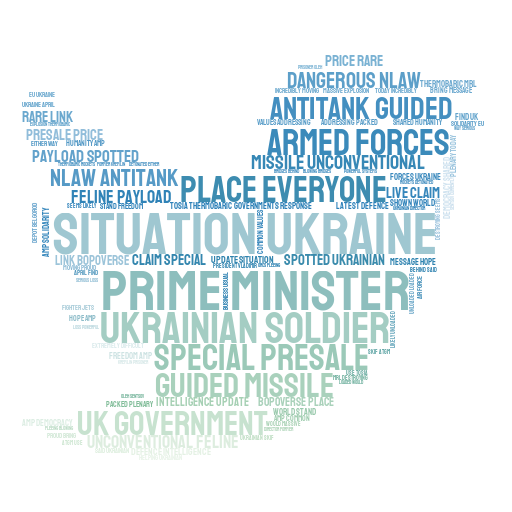

In [94]:
df_positive['text'].to_csv('pos_tweets.csv',index=False)

stylecloud.gen_stylecloud(file_path='pos_tweets.csv',
                          icon_name='fab fa-twitter',
                          palette='colorbrewer.qualitative.Paired_3',
                          background_color='white',
                          gradient='vertical',
                          stopwords=True,
                          custom_stopwords=['philipvollet','NFT','MINT','RT','THE','IS','WITH','ON','THIS','HTTPS','CO','TO','AND','OF','IT','MY','FOR','IN','a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can',          'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he',                          'her', 'here',           'hers', 'herself', 'him', 'himself', 'his', 'how',          'i',                               'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other',          'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she',                    "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some', 'such', 't', 'than', 'that', "that'll",           'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there',            'these', 'they',                                            'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'wasn', "wasn't", 'we',                                    'were', 'weren', "weren't", 'what',         'when',           'where',            'which', 'while', 'who',          'whom', 'why', 'will',          'with', 'won', "won't",          'wouldn', "wouldn't", 'y', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves']
                         )

from IPython.display import Image
Image('stylecloud.png')

###Plotting the word cloud of tweets labelled as negative

In [95]:
df_negative=df_balanced[df_balanced['label'] == 0]

df_negative.head()

,username,text,label,sentiment,text_leng,token_lens
35758,MurielVieux,on the ground russias invasion of ukraine phot...,0,Negative,34,37
233772,jrmichaluk,russians have reportedly left antonov airport ...,0,Negative,24,27
85184,melindaharing,team in said in last few minutes been given a...,0,Negative,42,48
187409,Theredthinline,early today 2 ukrainian mi24 attack helicopte...,0,Negative,43,52
165445,Bandito771,on this audio record from a high school in rel...,0,Negative,38,40


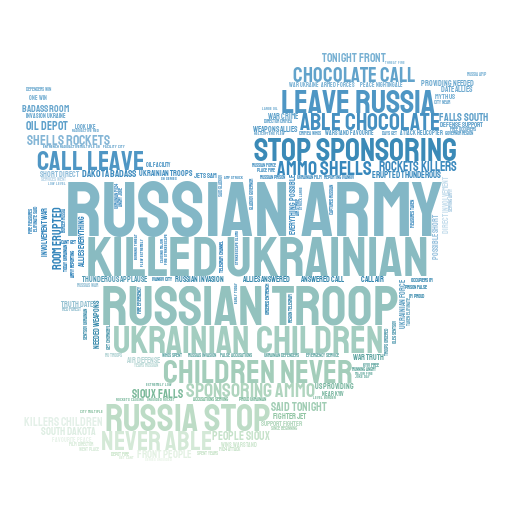

In [96]:
df_negative['text'].to_csv('neg_tweets.csv',index=False)

stylecloud.gen_stylecloud(file_path='neg_tweets.csv',
                          icon_name='fab fa-twitter',
                          palette='colorbrewer.qualitative.Paired_3',
                          background_color='white',
                          gradient='vertical',
                          stopwords=True,
                          custom_stopwords=['philipvollet','NFT','TASTE','MINT','RT','THE','IS','WITH','ON','THIS','HTTPS','CO','TO','AND','OF','IT','MY','FOR','IN','a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can',          'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he',                          'her', 'here',           'hers', 'herself', 'him', 'himself', 'his', 'how',          'i',                               'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other',          'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she',                    "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some', 'such', 't', 'than', 'that', "that'll",           'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there',            'these', 'they',                                            'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'wasn', "wasn't", 'we',                                    'were', 'weren', "weren't", 'what',         'when',           'where',            'which', 'while', 'who',          'whom', 'why', 'will',          'with', 'won', "won't",          'wouldn', "wouldn't", 'y', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves']
                         )

from IPython.display import Image
Image('stylecloud.png')

## Building the text classifier model

In [97]:
X=df_balanced['text'].values
y=df_balanced['label'].values

In [98]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.1,stratify=y, random_state=42)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [100]:
y_train_le=y_train.copy()
y_valid_le=y_valid.copy()
y_test_le=y_test.copy()

In [101]:
ohe=preprocessing.OneHotEncoder()
y_train=ohe.fit_transform(np.array(y_train).reshape(-1,1)).toarray()
y_valid=ohe.fit_transform(np.array(y_valid).reshape(-1,1)).toarray()
y_test=ohe.fit_transform(np.array(y_test).reshape(-1,1)).toarray()

In [102]:
print(f"TRAINING DATA:{X_train.shape[0]}\nVALIDATION DATA: {X_valid.shape[0]}\nTESTING DATA: {X_test.shape[0]}")

TRAINING DATA:129223
VALIDATION DATA: 16153
TESTING DATA: 32306


In [103]:
clf = CountVectorizer()
X_train_cv =  clf.fit_transform(X_train)
X_test_cv = clf.transform(X_test)

In [104]:
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_test_tf = tf_transformer.transform(X_test_cv)

In [105]:
nb_clf = MultinomialNB()

In [106]:
nb_clf.fit(X_train_tf, y_train_le)

MultinomialNB()

In [107]:
nb_pred=nb_clf.predict(X_test_tf)

In [108]:
print('\tClassification Report for Naive Bayes:\n\n',(classification_report(y_test_le,nb_pred)))

	Classification Report for Naive Bayes:

               precision    recall  f1-score   support

          -1       0.94      0.78      0.85     10725
           0       0.85      0.91      0.88     10634
           1       0.81      0.90      0.86     10947

    accuracy                           0.86     32306
   macro avg       0.87      0.86      0.86     32306
weighted avg       0.87      0.86      0.86     32306



### Printing the confusion matrix for Naive Bayes Classifier

In [116]:
print('Confusion matrix\n',confusion_matrix(y_test_le,nb_pred))

Confusion matrix
 [[8340  987 1398]
 [ 157 9634  843]
 [ 379  706 9862]]


### Our base Naive Bayes model gives us an accuracy of 86%

#### Now, we'll build a pipeline and try out different models to find out the best classification model for our data

In [109]:
sample_size = int(len(df_balanced)*0.05)
sampleDf = df_balanced.sample(sample_size, random_state=23)
X = sampleDf.text.values
y = sampleDf.label.values

# X=df_balanced.text
# y=df_balanced.label

In [110]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=42)

In [111]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6460,)
(1616,)
(6460,)
(1616,)


In [112]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB,ComplementNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

pipelines=[]
for model in [DecisionTreeClassifier(), MultinomialNB(), ComplementNB(), 
              LogisticRegression(solver='saga'), RidgeClassifier(solver='auto'), SVC(),RandomForestClassifier()]:
    pipeline=make_pipeline(TfidfVectorizer(), model)
    pipelines.append(pipeline)

In [113]:
#Training the model
import time
training_time=[]
for pipeline in pipelines:
    start=time.time()
    pipeline.fit(X_train, y_train)
    stop=time.time()
    training_time.append(stop-start)

In [114]:
#Prediction from test dataset
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
model_name=[]
precision_array=[]
recall_array=[]
f1_array=[]
test_time=[]
print("Classifiation Report\n")
print("*****************************************************")
for i, pipeline in enumerate(pipelines):
    start=time.time()
    y_pred=pipeline.predict(X_test)
    stop=time.time()
    test_time.append(stop-start)
    print(pipelines[i].steps[1][0].upper())
    model_name.append(pipelines[i].steps[1][0].upper())
    f1_array.append(round(f1_score(y_test, y_pred, average='weighted'),2))
    precision_array.append(round(precision_score(y_test, y_pred, average='weighted'),2))
    recall_array.append(round(recall_score(y_test, y_pred, average='weighted'),2))
    print("\n",classification_report(y_test, y_pred))
    print("*****************************************************")

Classifiation Report

*****************************************************
DECISIONTREECLASSIFIER

               precision    recall  f1-score   support

          -1       0.80      0.80      0.80       508
           0       0.87      0.87      0.87       564
           1       0.79      0.80      0.80       544

    accuracy                           0.82      1616
   macro avg       0.82      0.82      0.82      1616
weighted avg       0.82      0.82      0.82      1616

*****************************************************
MULTINOMIALNB

               precision    recall  f1-score   support

          -1       0.86      0.67      0.75       508
           0       0.77      0.85      0.81       564
           1       0.76      0.85      0.80       544

    accuracy                           0.79      1616
   macro avg       0.80      0.79      0.79      1616
weighted avg       0.80      0.79      0.79      1616

*****************************************************
COMPLEMENTNB


### Plotting the performance

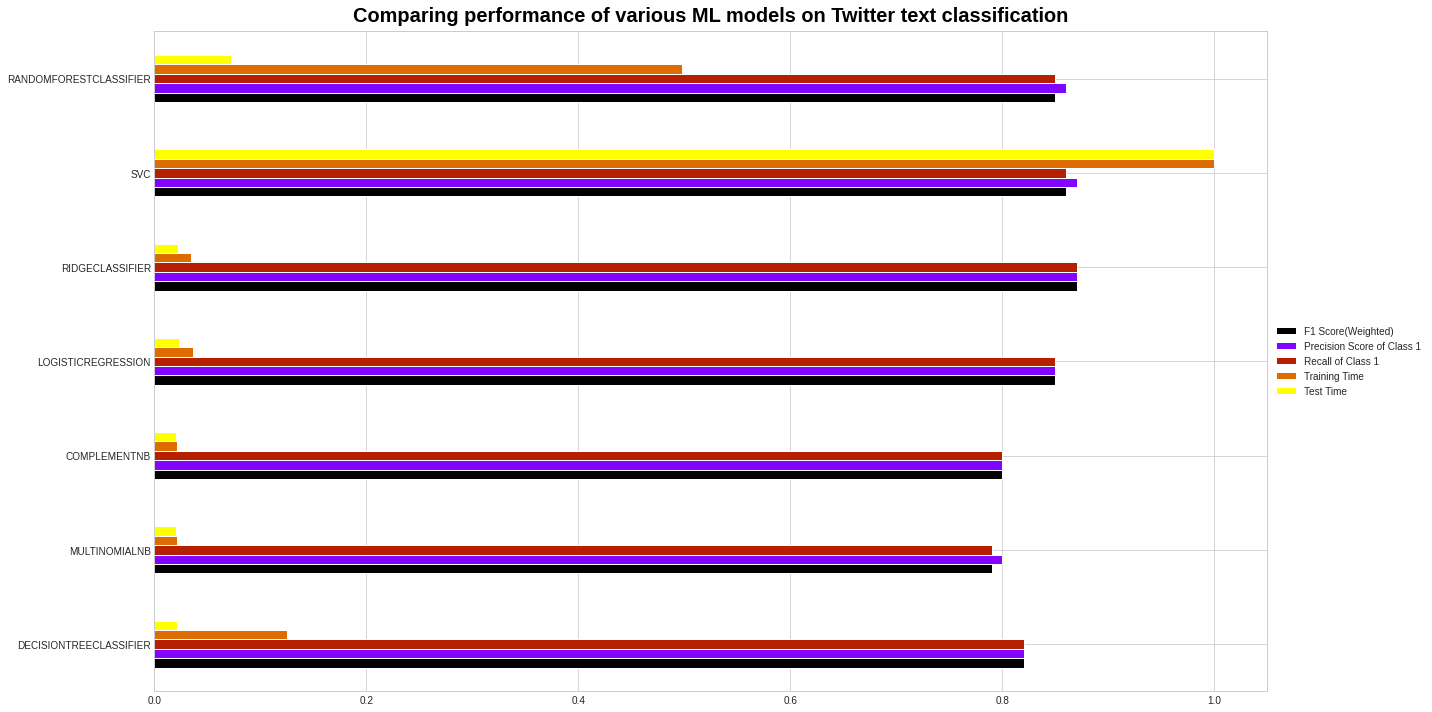

In [115]:
#Plotting the various performance metrix of all models
training_time=np.array(training_time)/np.max(training_time)
test_time=np.array(test_time)/np.max(test_time)
score_df=pd.DataFrame({'F1 Score(Weighted)':f1_array,
                     'Precision Score of Class 1':precision_array,
                     'Recall of Class 1':recall_array,
                      'Training Time': training_time,
                      'Test Time':test_time}, index=model_name)

f=plt.figure(figsize=(20,10))
plt.title('Comparing performance of various ML models on Twitter text classification', color='black', fontdict={'fontsize':20})
score_df.plot(kind='barh', ax=f.gca(), cmap='gnuplot')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

## **Conclusion**

In our approach to analyze twitter data sentiment of Russia-Ukraine war, we under took the following approach:

After the data processing and labeling of the dataset we found that:
  1. The dataset had a majority of neutral sentiment, followed by negative and then positive.
  2. As most tweets have a sentiment of either neutral or negative, we can infer that the majority is not in favour of the war.
  3. As twitter data includes users from all over the world who are not directly affected by the war, as a result high number of tweets fall under the neutral category.
  4. For classification we have built our base model on Naive Bayes which resulted in an accuracy of 86%
  5. Following this, to test our data on all models, we developed a pipeline and trained our model on 6 classification models. After applying the pipeline, we found that Ridge Classifier out-performed all other models with an accuracy of 89%

## **Future Work**

For future analysis, we use transformers to carry out sentiment analysis. We can make use of BERT and RoBERTa models for obtaining higher accuracy.